In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to Change These)
covid = "covid-clinical-trial_data_cleandata.csv"

# Read Purchasing File and store into Pandas data frame
covid_df = pd.read_csv(covid)
covid_df.head()

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Gender,Age,Phases,Enrollment,Study Type,URL
0,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,NaN,Completed,No Results Available,COVID-19,Drug: Infliximab,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Interventional,https://ClinicalTrials.gov/show/NCT04425538
1,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,NaN,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Interventional,https://ClinicalTrials.gov/show/NCT04452435
2,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,NaN,Completed,No Results Available,COVID-19,Drug: Tocilizumab,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Interventional,https://ClinicalTrials.gov/show/NCT04445272
3,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",NaN,Completed,No Results Available,COVID-19,Other: Exposure,All,"18 Years and older (Adult, Older Adult)",NaN,115,Observational,https://ClinicalTrials.gov/show/NCT04355741
4,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,NaN,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Interventional,https://ClinicalTrials.gov/show/NCT04578158


In [6]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: NCT Number", "Status", "Study Results", "Interventions",
                       "Phases", "Enrollment", "Study Type""
reduced_df = covid_df[["NCT Number", "Status", "Study Results", "Interventions",
                       "Phases", "Enrollment", "Study Type"]]
reduced_df.head()

,NCT Number,Status,Study Results,Interventions,Phases,Enrollment,Study Type
0,NCT04425538,Completed,No Results Available,Drug: Infliximab,Phase 2,17,Interventional
1,NCT04452435,Completed,Has Results,Drug: C21|Drug: Placebo,Phase 2,206,Interventional
2,NCT04445272,Completed,No Results Available,Drug: Tocilizumab,Phase 2,495,Interventional
3,NCT04355741,Completed,No Results Available,Other: Exposure,NaN,115,Observational
4,NCT04578158,Completed,No Results Available,Drug: Standard COVID-19 care|Dietary Supplemen...,Phase 3,152,Interventional


In [9]:
# Identify incomplete rows
covid_df.count()

NCT Number       1123
Title            1123
Acronym           398
Status           1123
Study Results    1123
Conditions       1123
Interventions     932
Gender           1116
Age              1123
Phases            511
Enrollment       1123
Study Type       1123
URL              1123
dtype: int64

In [11]:
# Drop all rows with missing information
covid_df = covid_df.dropna(how='any')

In [13]:
# Verify dropped rows
covid_df.count()

NCT Number       175
Title            175
Acronym          175
Status           175
Study Results    175
Conditions       175
Interventions    175
Gender           175
Age              175
Phases           175
Enrollment       175
Study Type       175
URL              175
dtype: int64

In [15]:
# The Amount column is the wrong data type. It should be numeric.
covid_df.dtypes

NCT Number       object
Title            object
Acronym          object
Status           object
Study Results    object
Conditions       object
Interventions    object
Gender           object
Age              object
Phases           object
Enrollment        int64
Study Type       object
URL              object
dtype: object

In [16]:
# Display an overview of the Phases column
covid_df['Phases'].value_counts()

Not Applicable    69
Phase 2           52
Phase 3           37
Phase 1            9
Phase 4            8
Name: Phases, dtype: int64

In [17]:
# Verify clean-up.
covid_df['Phases'].value_counts()

Not Applicable    69
Phase 2           52
Phase 3           37
Phase 1            9
Phase 4            8
Name: Phases, dtype: int64

In [18]:
# Display a statistical overview
# We can infer the maximum allowable individual contribution from 'max'
#covid_df.describe()

,Enrollment
count,175.000000
mean,531.017143
std,2011.402794
min,2.000000
25%,36.000000
50%,120.000000
75%,300.000000
max,22000.000000


In [20]:
#Arrange variable
phases= len(covid_df['Phases'].unique())

#set in DF
phases_df = pd.DataFrame({"all phases": [len(covid_df.Phases.unique())]})
phases_df

,all phases
0,5


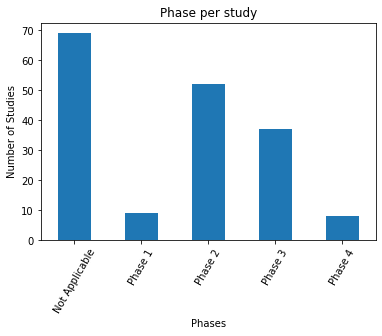

In [22]:
# Generate a bar plot showing the total number of Enrollment for all samples n using Pandas.
data_points = covid_df.groupby('Phases').count()['Enrollment']
panda_bar = pd.DataFrame(data_points)
#plot bar
also = panda_bar.plot.bar(legend=False,rot=60)
also
plt.ylabel("Number of Studies")
plt.title("Phase per study")
plt.savefig('barplot1')

In [23]:
panda_bar.head()

,Enrollment
Phases,
Not Applicable,69
Phase 1,9
Phase 2,52
Phase 3,37
Phase 4,8


In [24]:
#generate pie chart

# Generate a pie plot showing the distribution of studies type using Pandas
#visualiza study type

bystudytype = covid_df.groupby("Study Type").count()
bystudytype

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Gender,Age,Phases,Enrollment,URL
Study Type,,,,,,,,,,,,
Interventional,175,175,175,175,175,175,175,175,175,175,175,175
